## --Project || Proposal of ML Model for COVID19 Predictions ||--

### Introduction of Project ::--

-- The COVID-19 pandemic has had a profound impact on the world, affecting public health, economies, and daily life. Predicting the spread of the virus and its impact on communities has become a critical task. In response to this, an end-to-end COVID-19 prediction model project has been developed to harness the power of data science and machine learning to aid in forecasting and understanding the dynamics of the pandemic.In this project,we are going to explore various factors and use predictive models to improve the accuracy of COVID19 status predictions.This predictive model can be helpful for the overall medical sectors to get COVID19 status for future patients in a hassel free process.

### Project Objective ::--

--The primary objective of this project is to create a robust and accurate COVID-19 prediction model that can forecast key pandemic-related metrics by exploring different parameters. By leveraging historical data and various machine learning techniques, we aim to provide timely and reliable insights to inform public health interventions, resource allocation, and policy decisions.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## -- Basic Data Exploration --

#### <font color = 'Orange'>--- Reading CSV Files to Dataframe ---

#### <font color = 'Orange'>--- Reading the "corona_test_data.csv" dataframe. Using "encoding" to specify an encoding to use when reading a file --

In [147]:
cov=pd.read_csv("corona_test_data.csv")
cov

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other


### <font color = 'White'>---->> When the dataset was reading in Excel any upper or lower case issue was not found but here in Pandas the issue can be seen easily.So during the reading here in Pandas I am mentioning "dtype" parameter for the effected columns and also mensioning the "encoding".

In [148]:
covid=pd.read_csv("corona_test_data.csv",dtype= {"Cough_symptoms":"str","Fever":"str","Sore_throat":"str",
                                                "Shortness_of_breath":"str","Headache":"str"},
                                                encoding="utf-8")
covid

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,positive,None,male,Other
278844,278845,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,female,Other
278845,278846,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other
278846,278847,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other


#### <font color = 'White'>---->> Here First thing came into my notice that output column "Corona" is in the middle of dataset. So here I am going to move that column to the last index.

In [149]:
#### Poping up the "Corona" column move into the last as it is the Output Column ####
op_col="Corona"
column=covid.pop(op_col)
covid[op_col]=column

In [150]:
covid.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Corona
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,None,None,Abroad,negative
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,None,None,Abroad,positive
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,None,None,Abroad,positive
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,None,None,Abroad,negative
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,None,None,Contact with confirmed,negative


In [151]:
covid.tail()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Corona
278843,278844,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,None,male,Other,positive
278844,278845,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,None,female,Other,negative
278845,278846,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,None,male,Other,negative
278846,278847,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,None,male,Other,negative
278847,278848,30-04-2020,FALSE,FALSE,FALSE,FALSE,FALSE,None,female,Other,negative


In [6]:
covid.shape

(278848, 11)

In [7]:
covid.drop_duplicates().shape

(278848, 11)

#### <font color = 'Yellow'>---->> Here number of entries haven't reduced that means There was no duplicate entries in "covid" dataframe. 

In [62]:
covid.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex',
       'Known_contact', 'Corona'],
      dtype='object')

In [65]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Age_60_above         278848 non-null  object
 8   Sex                  278848 non-null  object
 9   Known_contact        278848 non-null  object
 10  Corona               278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [30]:
covid.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Age_60_above           0
Sex                    0
Known_contact          0
Corona                 0
dtype: int64

In [33]:
covid.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Corona
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,None,None,Abroad,negative
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,None,None,Abroad,positive
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,None,None,Abroad,positive
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,None,None,Abroad,negative
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,None,None,Contact with confirmed,negative


#### <font color = 'Yellow'>---->> Here we can Some of values represented as "None" in different columns. So we have to check it wheather it is representing null values or some other meaning in "covid" Dataframe

#### <font color = 'Orange'>---- Checking "None" Vlaues from diferent features of Dataframe ----

In [153]:
covid["Age_60_above"].value_counts()

None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64

In [154]:
covid["Sex"].value_counts()

female    130158
male      129127
None       19563
Name: Sex, dtype: int64

In [155]:
covid["Cough_symptoms"].value_counts()

FALSE    236368
TRUE      42228
None        252
Name: Cough_symptoms, dtype: int64

In [156]:
covid["Fever"].value_counts()

FALSE    256844
TRUE      21752
None        252
Name: Fever, dtype: int64

In [157]:
covid["Sore_throat"].value_counts()

FALSE    276921
TRUE       1926
None          1
Name: Sore_throat, dtype: int64

In [158]:
covid["Shortness_of_breath"].value_counts()

FALSE    277270
TRUE       1577
None          1
Name: Shortness_of_breath, dtype: int64

In [159]:
covid["Headache"].value_counts()

FALSE    276433
TRUE       2414
None          1
Name: Headache, dtype: int64

#### <font color = 'White'>---->> Here it seems in Boolean Valued Columns the "None" value represents null values.

#### <font color = 'White'>---->> In the columns "Age_60_above" and "Sex" the "None" value indicates some other things.

#### <font color = 'Orange'>--- Replacing None Values with Suitable Terms ---

In [160]:
covid["Age_60_above"]=covid["Age_60_above"].replace("None","Not_known")
covid["Sex"]=covid["Sex"].replace("None","Other")
covid["Corona"]=covid["Corona"].replace("other","report_waiting")

#### <font color = 'Yellow'>---->> Here I replaced "None" value with better understandable terms in both  "Age_60_above" and "Sex" column.

In [161]:
columns=["Cough_symptoms","Fever","Sore_throat","Shortness_of_breath","Headache"]
covid[columns]=covid[columns].replace("None",np.NaN)

#### <font color = 'Yellow'>---->> Here I replaced "None" value to "null" values with the help of null function for those above mentioned columns.

In [162]:
covid.isnull().sum()

Ind_ID                   0
Test_date                0
Cough_symptoms         252
Fever                  252
Sore_throat              1
Shortness_of_breath      1
Headache                 1
Age_60_above             0
Sex                      0
Known_contact            0
Corona                   0
dtype: int64

#### <font color = 'Orange'>--- Exploring Missing Values Through Visualization ---

<Axes: >

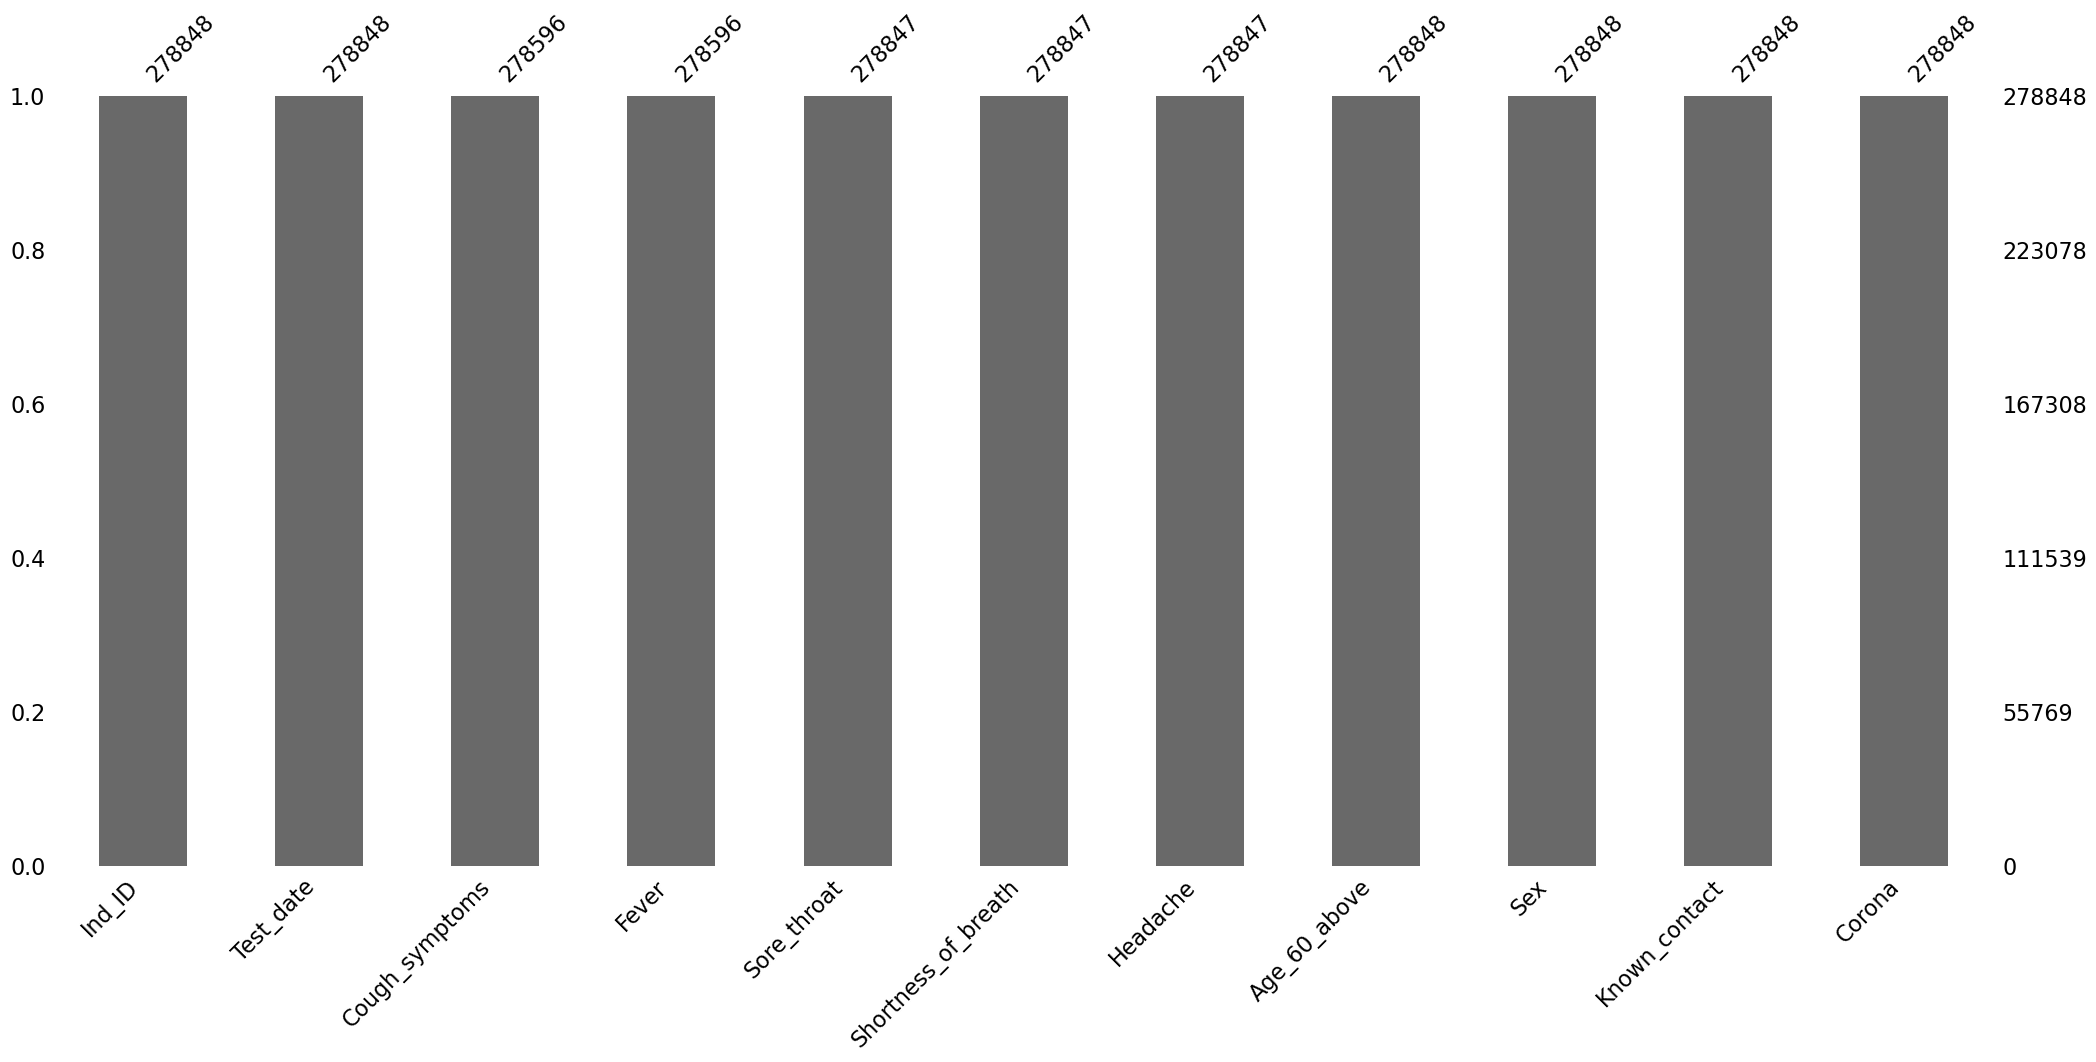

In [163]:
import missingno as msno
msno.bar(covid)

#### <font color = 'Yellow'>---->> Here we can see the null values present in whole "covid" Dataframe with the help of Visualization.

#### <font color = 'Orange'>---- Dealing With Missing Values ----

#### <font color = 'White'>---->> Here in these three columns : "Sore_throat","Shortness_of_breath","Headache" have only one missing value each. So here i am going to drop those.

In [164]:
col=["Sore_throat","Shortness_of_breath","Headache"]
covid=covid.dropna(subset=col)

#### <font color = 'White'>---->> Now in "Cough_symptoms" and "Fever" columns there are few values are null. So here I am going to fill these values with "MODE-Imputation" process.

In [168]:
covid["Cough_symptoms"].fillna(covid["Cough_symptoms"].mode()[0], inplace=True)
covid["Fever"].fillna(covid["Fever"].mode()[0], inplace=True)

In [169]:
covid.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Age_60_above           0
Sex                    0
Known_contact          0
Corona                 0
dtype: int64

In [170]:
covid.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Corona
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,Not_known,Other,Abroad,negative
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,Not_known,Other,Abroad,positive
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,Not_known,Other,Abroad,positive
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,Not_known,Other,Abroad,negative
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,Not_known,Other,Contact with confirmed,negative


In [171]:
#### Saving The Latest Optimized Dataframe to a CSV File ####
cov_data=covid.to_csv("cleaned_covid_data.csv")

In [3]:
cov_data=pd.read_csv("cleaned_covid_data.csv")
cov_data.head()

,Unnamed: 0,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Corona
0,0,1,11-03-2020,True,False,True,False,False,Not_known,Other,Abroad,negative
1,1,2,11-03-2020,False,True,False,False,False,Not_known,Other,Abroad,positive
2,2,3,11-03-2020,False,True,False,False,False,Not_known,Other,Abroad,positive
3,3,4,11-03-2020,True,False,False,False,False,Not_known,Other,Abroad,negative
4,4,5,11-03-2020,True,False,False,False,False,Not_known,Other,Contact with confirmed,negative


In [4]:
cov_data=cov_data.drop(columns=["Unnamed: 0"],axis=1)
cov_data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Corona
0,1,11-03-2020,True,False,True,False,False,Not_known,Other,Abroad,negative
1,2,11-03-2020,False,True,False,False,False,Not_known,Other,Abroad,positive
2,3,11-03-2020,False,True,False,False,False,Not_known,Other,Abroad,positive
3,4,11-03-2020,True,False,False,False,False,Not_known,Other,Abroad,negative
4,5,11-03-2020,True,False,False,False,False,Not_known,Other,Contact with confirmed,negative


In [5]:
import scipy.stats as stats
contingency_tbl = pd.crosstab(index=cov_data["Sex"], columns=[cov_data["Corona"]],margins=True)
chi2, p, _,_ = stats.chi2_contingency(contingency_tbl)
print("Chi-squared statistic:", chi2)
print("p-value:", p)
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the variables.")

Chi-squared statistic: 453.3716188822091
p-value: 5.4534616863064257e-92
Reject the null hypothesis: There is a significant association between the variables.


#### <font color = 'Yellow'>---->> When Chi-squared test performed between each input column with the output column it is found that only sex column rejected the null hypothesis and doesnot have much impact on output column.

#### <font color = 'Orange'>---- Features Encoding (Prepearing The Dataset for ML Modelling) ----

#### <font color = 'Orange'>---- First Exploring All The Categorical Columns and Their Values ----

In [180]:
cov_data["Cough_symptoms"].unique()

array([ True, False])

In [181]:
cov_data["Fever"].unique()

array([False,  True])

In [182]:
cov_data["Sore_throat"].unique()

array([ True, False])

In [183]:
cov_data["Shortness_of_breath"].unique()

array([False,  True])

In [184]:
cov_data["Headache"].unique()

array([False,  True])

In [176]:
cov_data["Age_60_above"].unique()

array(['Not_known', 'No', 'Yes'], dtype=object)

In [177]:
cov_data["Sex"].unique()

array(['Other', 'male', 'female'], dtype=object)

In [178]:
cov_data["Known_contact"].unique()

array(['Abroad', 'Contact with confirmed', 'Other'], dtype=object)

In [179]:
cov_data["Corona"].unique()

array(['negative', 'positive', 'report_waiting'], dtype=object)

#### <font color = 'Orange'>---- Encoding All The Columns Using Label Encoder ----

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cov_data["Cough_symptoms"]=le.fit_transform(cov_data["Cough_symptoms"])
cov_data["Fever"]=le.fit_transform(cov_data["Fever"])
cov_data["Sore_throat"]=le.fit_transform(cov_data["Sore_throat"])
cov_data["Shortness_of_breath"]=le.fit_transform(cov_data["Shortness_of_breath"])
cov_data["Headache"]=le.fit_transform(cov_data["Headache"])
cov_data["Age_60_above"]=le.fit_transform(cov_data["Age_60_above"])
cov_data["Sex"]=le.fit_transform(cov_data["Sex"])
cov_data["Known_contact"]=le.fit_transform(cov_data["Known_contact"])
cov_data["Corona"]=le.fit_transform(cov_data["Corona"])

In [7]:
cov_data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Corona
0,1,11-03-2020,1,0,1,0,0,1,0,0,0
1,2,11-03-2020,0,1,0,0,0,1,0,0,1
2,3,11-03-2020,0,1,0,0,0,1,0,0,1
3,4,11-03-2020,1,0,0,0,0,1,0,0,0
4,5,11-03-2020,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
278842,278844,30-04-2020,0,0,0,0,0,1,2,2,1
278843,278845,30-04-2020,0,0,0,0,0,1,1,2,0
278844,278846,30-04-2020,0,0,0,0,0,1,2,2,0
278845,278847,30-04-2020,0,0,0,0,0,1,2,2,0


#### <font color = 'Orange'>---- Checking Correlation between Features to Justify the Output Column ----

<Axes: >

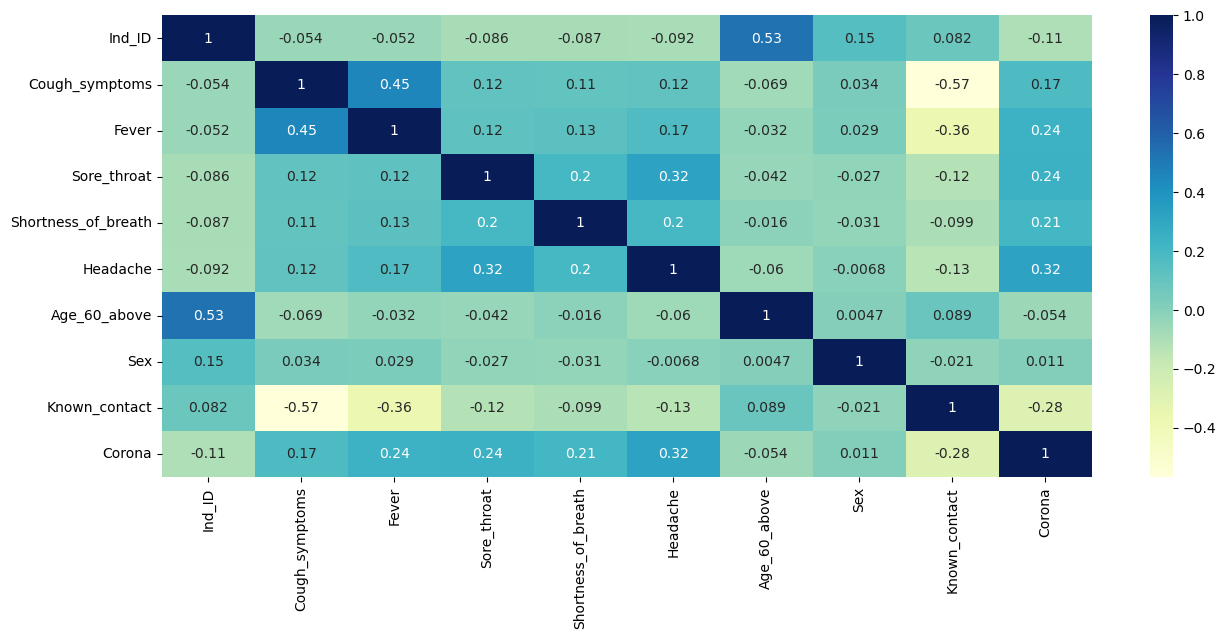

In [8]:
plt.figure(figsize=(15,6))
sns.heatmap(cov_data.corr(method="spearman"),cmap="YlGnBu",annot=True)

In [9]:
cov_data.to_csv("ML_covid_data.csv")

#### <font color = 'Yellow'>---->> All the Encoding of the features is finished here amd made the Dataframe ready and saved for applying ML Algorithms.

### ----- Applying ML Algorithms -----

In [4]:
ml_cov=pd.read_csv("ML_covid_data.csv")
ml_cov.head()

,Unnamed: 0,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Corona
0,0,1,11-03-2020,1,0,1,0,0,1,0,0,0
1,1,2,11-03-2020,0,1,0,0,0,1,0,0,1
2,2,3,11-03-2020,0,1,0,0,0,1,0,0,1
3,3,4,11-03-2020,1,0,0,0,0,1,0,0,0
4,4,5,11-03-2020,1,0,0,0,0,1,0,1,0


In [5]:
ml_cov.drop(columns=["Unnamed: 0","Ind_ID","Test_date"],inplace=True)
ml_cov.head()

#### Here droping these unwanted columns from the dataset to perform smoothly in ML Algorithms. ####

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Corona
0,1,0,1,0,0,1,0,0,0
1,0,1,0,0,0,1,0,0,1
2,0,1,0,0,0,1,0,0,1
3,1,0,0,0,0,1,0,0,0
4,1,0,0,0,0,1,0,1,0


In [6]:
from sklearn.model_selection import train_test_split    #### For training and testings ####
from sklearn.model_selection import ShuffleSplit    #### For Applying Cross validation ####
from sklearn.model_selection import cross_val_score    #### For Checking Cross validation score ####

In [7]:
X=ml_cov.drop(columns=["Corona"])
Y=ml_cov["Corona"]

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.70,test_size=0.30,stratify=Y,
                                              random_state=1500)

In [9]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((195192, 8), (83655, 8), (195192,), (83655,))

<font color = 'Orange'>---- Standardization or Scaling The dataframe using Standard Scaler Function ----

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
std_scaler=StandardScaler()
std_X_train=std_scaler.fit_transform(X_train)
std_X_test=std_scaler.fit_transform(X_test)
std_X_train.shape , std_X_test.shape

((195192, 8), (83655, 8))

#### ---- Applying Different ML Algorithms to Check the Performance and Decide the Best Suitable Model ----

#### <font color = 'Orange'>---- Logigstic Regression ----

#### <font color = 'White'>---- Model Training ----

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
log_reg=LogisticRegression(max_iter=500,solver="liblinear",C=1.0,random_state=2000)
log_reg.fit(std_X_train,Y_train)

LogisticRegression(max_iter=500, random_state=2000, solver='liblinear')

#### <font color = 'White'>---- Model Evaluation ----

In [13]:
Y_pred=log_reg.predict(std_X_test)
Y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [14]:
Y_test

22891     0
205879    0
67584     0
259427    0
27322     1
         ..
122928    0
129309    0
15063     0
100686    1
106519    0
Name: Corona, Length: 83655, dtype: int64

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_pred,Y_test)

array([[77900,  3421,  1151],
       [  169,   997,    17],
       [    0,     0,     0]], dtype=int64)

In [16]:
accuracy_score(Y_test,Y_pred)

0.9431235431235431

####  <font color = 'White'>---- Cross Validation of Logistic Regession Model ----

In [17]:
model=LogisticRegression()
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
result=cross_val_score(model,X,Y,cv=ssplit)

In [18]:
print(result)
print(result.mean())

[0.94301596 0.94454605 0.94412767 0.94357779 0.94243022 0.94398422
 0.94336262 0.94363756 0.94385273 0.94320722]
0.9435742035742034


#### <font color = 'Orange'>----Decision Tree ----

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#### <font color = 'White'>---- Model Training ----

In [20]:
d_tree=DecisionTreeClassifier(max_depth=50,max_features=10,random_state=2000)
d_tree.fit(std_X_train,Y_train)

DecisionTreeClassifier(max_depth=50, max_features=10, random_state=2000)

#### <font color = 'White'>----Model Evaluation ----

In [21]:
Y_pred=d_tree.predict(std_X_test)
Y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [22]:
Y_test

22891     0
205879    0
67584     0
259427    0
27322     1
         ..
122928    0
129309    0
15063     0
100686    1
106519    0
Name: Corona, Length: 83655, dtype: int64

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[77434,   634,     1],
       [ 2000,  2417,     1],
       [ 1120,    48,     0]], dtype=int64)

In [24]:
accuracy_score(Y_test,Y_pred)

0.954527523758293

In [26]:
Y_pred_train = d_tree.predict(std_X_train)
accuracy_score(Y_train, Y_pred_train)

0.9572882085331366

#### <font color = 'White'>---- Cross Validation of Decision Tree Model ----

In [30]:
model=DecisionTreeClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
result=cross_val_score(model,X,Y,cv=ssplit)

In [31]:
print(result)
print(result.mean())

[0.95608153 0.9567629  0.95618911 0.95587831 0.95545992 0.95642819
 0.95689439 0.95621302 0.95563923 0.9560098 ]
0.9561556392325624


#### <font color = 'Orange'>---- Random Forest ----

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#### <font color = 'White'>---- Model Training ----

In [52]:
rf=RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=2000)
rf.fit(std_X_train,Y_train)

RandomForestClassifier(criterion='entropy', random_state=2000)

#### <font color = 'White'>----Model Evaluation ----

In [53]:
Y_pred=rf.predict(std_X_test)
Y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [54]:
Y_test

22891     0
205879    0
67584     0
259427    0
27322     1
         ..
122928    0
129309    0
15063     0
100686    1
106519    0
Name: Corona, Length: 83655, dtype: int64

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_pred,Y_test)

array([[77432,  1985,  1120],
       [  637,  2432,    48],
       [    0,     1,     0]], dtype=int64)

In [56]:
accuracy_score(Y_test,Y_pred)

0.9546829239136931

#### <font color = 'White'>----Cross Validation of Random Forest Classifier ----

In [57]:
model=RandomForestClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
result=cross_val_score(model,X,Y,cv=ssplit)

In [58]:
print(result)
print(result.mean())

[0.95536429 0.95622497 0.95579463 0.95645209 0.95566314 0.95629669
 0.95781483 0.95620106 0.95696611 0.95555556]
0.9562333393102623


#### <font color = 'Orange'>---- Support Vector Machine [SV Classification] ----

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [13]:
svm=SVC(kernel='rbf',gamma=0.5,C=1.0)
svm.fit(std_X_train,Y_train)

SVC(gamma=0.5)

In [15]:
Y_pred=svm.predict(std_X_test)
Y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [16]:
Y_test

22891     0
205879    0
67584     0
259427    0
27322     1
         ..
122928    0
129309    0
15063     0
100686    1
106519    0
Name: Corona, Length: 83655, dtype: int64

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_pred,Y_test)

array([[77420,  1976,  1118],
       [  649,  2442,    50],
       [    0,     0,     0]], dtype=int64)

In [20]:
accuracy_score(Y_test,Y_pred)

0.9546590161974777

####  <font color = 'Orange'>----XGBoost Classifier ----

In [3]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [12]:
xgb_c=XGBClassifier(objective='multi:softmax',max_depth=7, num_class=3, random_state=2000)
xgb_c.fit(std_X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [13]:
Y_pred=xgb_c.predict(std_X_test)
Y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [14]:
Y_test

22891     0
205879    0
67584     0
259427    0
27322     1
         ..
122928    0
129309    0
15063     0
100686    1
106519    0
Name: Corona, Length: 83655, dtype: int64

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[77433,   636,     0],
       [ 1982,  2435,     1],
       [ 1120,    48,     0]], dtype=int64)

In [16]:
accuracy_score(Y_test,Y_pred)

0.954730739346124

#### <font color = 'White'>---- Cross Validation of XGBoost Classifier Model ----

In [17]:
model=XGBClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
result=cross_val_score(model,X,Y,cv=ssplit)

In [18]:
print(result)
print(result.mean())

[0.95645209 0.95557946 0.95605762 0.95567509 0.95640428 0.9569422
 0.95739645 0.95618911 0.95606957 0.95629669]
0.9563062578447192


#### <font color = 'Orange'>---- After doing different Classification and Regression process we have got the different Accuracy as mentioned below ----

#### <font color = 'Yellow'> //1//--- Doing Logistic Regression we got the Accuracy of around 94%.

#### <font color = 'Yellow'>//2//--- Doing Decision Tree Classification we got the Accuracy of around 95%.

#### <font color = 'Yellow'>//3//--- Doing Random Forest Classification we got the Accuracy of around 95%.

#### <font color = 'Yellow'>//4//--- Doing SV Classification we got the Accuracy of around 95%.

####  <font color = 'Yellow'>//5//--- Doing XGBoost Classification we got the Accuracy of around 95%.

### ----Conclusion----

<br>
---- Here In this "COVID19 Prediction" end-to-end project, I set out to develop a machine learning model that can predict wheather a patient is infected with COVID19 or NOT. Through a systematic process, I have done all the elementry Data Analysing steps needed and plotted graphs to determine the correlation among the variables and addressed as data exploration,data preprocessing,feature encoding,feature selection and model building and evaluation to achieve our goal. 

<br>
---- In Feature selection and Model building , I have used five different types of Machine Learning models to achieve the best predictive model. So here all the models have performed well and got the most same "around 95%" accuracy with FOUR Models named as Decision Tree Classification process,Random Forest Classification process,SV Classification Process,XGBoost Classification process.So,here in this case some other things we have to keep in our mind like which process taking more or less time,usage of memory,model complexity,resource constraints etc.

<br>
So here, Among these four models I am going to cancel out the SV Classification process and XGBoost Classification process as these two models taking so much time to predict and memory cosumption will be more in these cases. Now between Decision Tree Classification process and Random Forest Classification process they both are kind of equally time consuming but in Random forest classification model complexity is comperatively more than the Dicision tree Classification Process and also nio overfitting issue found in this Decision Tree Classification Model.So here I am going to choose the Decision Tree Classification Model with around 95% accuracy particularly for this project.

<br>
---- In conclusion,this "COVID19 Prediction" end-to-end project is showing the power of machine learning in automating and optimizing the COVID status decision making process.With the data-driven insights and predictive modeling,this project will contribute in the better-informed COVID status diagnostic and demonstrated the potential for further advancements in the medical sectors.

## --------------------------------- END ---------------------------------------